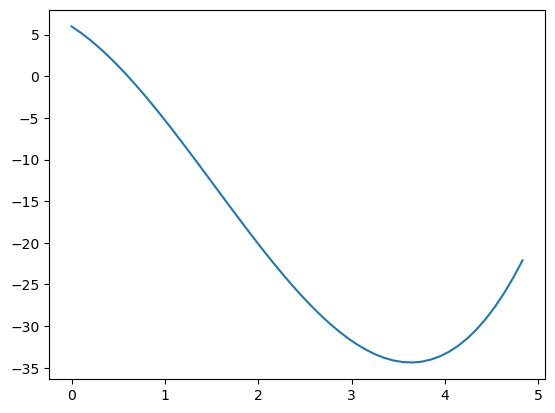

In [413]:
import numpy as np
import matplotlib.pyplot as plt
import math

def f(P):
    return P[0]**3 + 2*P[0]*(P[1]**2) - P[1]**3 - 20*P[0]

P1 = np.array([-0.7, 1.6])
P2 = np.array([3.7, -0.4])    

dir = P2 - P1
mod_dir = np.linalg.norm(dir)
dir_unit = dir/mod_dir
  
alphas = np.linspace(0, mod_dir)
x3 = np.array([f(P1 + alpha*dir_unit) for alpha in alphas])
plt.plot(alphas, x3)


In [414]:
def dirUnit(direcao):
    return direcao/np.linalg.norm(direcao)

In [415]:
def passo_cte(dir_unit, P1, f, step=0.01, mod_dir=1000):
        #recebe o vetor direcao unitario, P1, funcao
        #pode receber tambem o modulo do vetor direcao e o step
        for alpha in np.arange(0, mod_dir, step):
                Pmin = P1 + alpha*dir_unit
                alpha_min = alpha
                if (f(P1 + alpha*dir_unit) < f(P1 + (alpha+step)*dir_unit)):
                        break
        
        #retorna o P(x1,x2) minimo e o intervalo de busca(alpha minimo e o alpha seguinte)                 
        return Pmin, np.array([alpha_min, alpha_min+step])
    
passo_cte(dir_unit, P1, f)

(array([2.61373398, 0.09375728]), array([3.64, 3.65]))

In [416]:
def bissecao(intervalo, dir_unit, P1, f, tol=0.00001):
    
    alpha_upper = intervalo[1]
    alpha_lower = intervalo[0]
    alpha_med = (alpha_lower + alpha_upper)/2
    Pmin = P1 + alpha_med*dir_unit    
    
    if (alpha_upper - alpha_lower) <= tol:
        return Pmin, alpha_med
    else:
        f1 = f(P1 + (alpha_med - tol)*dir_unit)
        f2 = f(P1 + (alpha_med + tol)*dir_unit)
              
        if (f1 > f2):
            alpha_lower = alpha_med
            intervalo[0] = alpha_lower
            return  bissecao(intervalo, dir_unit, P1, f, tol)
        else:
            alpha_upper = alpha_med
            intervalo[1] = alpha_upper
            
    return  bissecao(intervalo, dir_unit, P1, f, tol)

bissecao(passo_cte(dir_unit, P1, f)[1], dir_unit, P1, f)

(array([2.61373842, 0.09375526]), 3.6400048828125)

In [417]:
def secao_aurea_recursiva(intervalo, dir_unit, P1, f, tol=0.00001):
    #nao é a melhor implementacao pois chama funcao f 2vezes em cada iteração
    alpha_upper = intervalo[1]
    alpha_lower = intervalo[0]
    alpha_med = (alpha_lower + alpha_upper)/2
    Pmin = P1 + alpha_med*dir_unit
    
    beta = alpha_upper - alpha_lower
    Ra = (math.sqrt(5)-1)/2
    
    if beta <= tol :
        return Pmin, alpha_med
    else:
        alpha_e = alpha_lower + (1-Ra)*beta
        alpha_d = alpha_lower + Ra*beta
        f1 = f(P1 + alpha_e*dir_unit)
        f2 = f(P1 + alpha_d*dir_unit)
        if (f1 > f2):
            alpha_lower = alpha_e
            intervalo[0] = alpha_lower            
        else:
            alpha_upper = alpha_d
            intervalo[1] = alpha_upper
    return secao_aurea(intervalo, dir_unit, P1, f, tol)

secao_aurea(passo_cte(dir_unit, P1, f)[1], dir_unit, P1, f)

(array([2.61373732, 0.09375577]), 3.6400036656871793)

In [418]:
def secao_aurea(intervalo, dir_unit, P1, f, tol=0.00001):
    alpha_upper = intervalo[1]
    alpha_lower = intervalo[0]
    beta = alpha_upper - alpha_lower
    Ra = (math.sqrt(5)-1)/2
    
    alpha_e = alpha_lower + (1-Ra)*beta
    alpha_d = alpha_lower + Ra*beta 
    f1 = f(P1 + alpha_e*dir_unit)
    f2 = f(P1 + alpha_d*dir_unit)
    
    while (beta > tol):
        if (f1 > f2):
            alpha_lower = alpha_e
            f1 = f2
            beta = alpha_upper - alpha_lower
            alpha_e = alpha_lower + (1-Ra)*beta
            alpha_d = alpha_lower + Ra*beta 
            f2 = f(P1 + alpha_d*dir_unit)
        else:
            alpha_upper = alpha_d
            f2 = f1
            beta = alpha_upper - alpha_lower
            alpha_e = alpha_lower + (1-Ra)*beta
            alpha_d = alpha_lower + Ra*beta 
            f1 = f(P1 + alpha_e*dir_unit)
            
    alpha_med = (alpha_lower + alpha_upper)/2
    Pmin = P1 + alpha_med*dir_unit
    
    return Pmin, alpha_med

secao_aurea(passo_cte(dir_unit, P1, f)[1], dir_unit, P1, f)

(array([2.61373732, 0.09375577]), 3.6400036656871793)

[0.04743504 0.09487008] 2.1300048828125 2.1300048828125


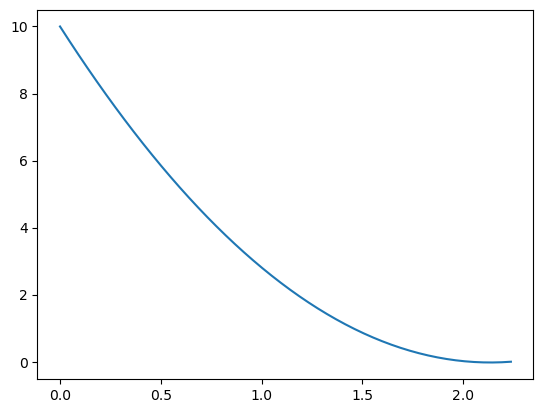

In [419]:
def f(P):
    return P[0]**2 - 3*P[0]*P[1] + 4*(P[1]**2) + P[0] - P[1]
    
P1 = np.array([1, 2])
dir = np.array([-1, -2])

alphas = np.linspace(0,np.linalg.norm(dir))
x3 = np.array([f(P1 + alpha*dirUnit(dir)) for alpha in alphas])
plt.plot(alphas, x3)
met_passo_cte = passo_cte(dirUnit(dir), P1, f)
met_bissecao = bissecao(met_passo_cte[1], dir_unit, P1, f)
met_secao_aurea = secao_aurea(met_passo_cte[1], dir_unit, P1, f)

print(met_passo_cte[0], met_bissecao[1], met_secao_aurea[1])

[-0.70939471 -1.03880403] [1.85995831 1.2454735 ] [1.85995831 1.2454735 ]


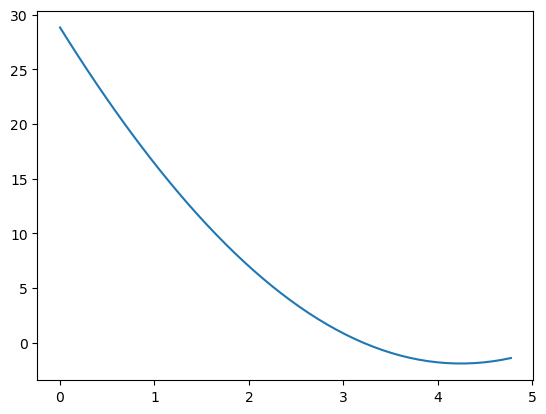

In [420]:
def f(P):
    #McCormick
    return math.sin(P[0] + P[1]) + (P[0] - P[1])**2 - 1.5*P[1] + 2.5*P[1]
    
P1 = np.array([-2, 3])
dir = np.array([1.453, -4.547])

alphas = np.linspace(0,np.linalg.norm(dir))
x3 = np.array([f(P1 + alpha*dirUnit(dir)) for alpha in alphas])
plt.plot(alphas, x3)
met_passo_cte = passo_cte(dirUnit(dir), P1, f)
met_bissecao = bissecao(met_passo_cte[1], dir_unit, P1, f)
met_secao_aurea = secao_aurea(met_passo_cte[1], dir_unit, P1, f)

print(met_passo_cte[0], met_bissecao[0], met_secao_aurea[0])

[0. 5.] [0.00909922 4.99586399] [0.00909922 4.99586399]


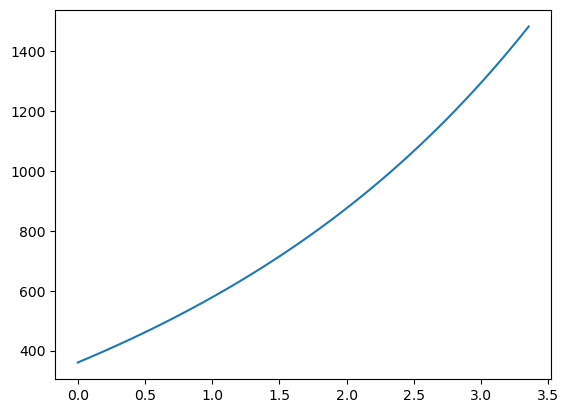

In [421]:
def f(P):
    #Himmelblau
    return (P[0]**2 + P[1] - 11)**2 + (P[0] + P[1]**2 - 7)**2

P1 = np.array([0, 5])
dir = np.array([3, 1.5])

alphas = np.linspace(0,np.linalg.norm(dir))
x3 = np.array([f(P1 + alpha*dirUnit(dir)) for alpha in alphas])
plt.plot(alphas, x3)
met_passo_cte = passo_cte(dirUnit(dir), P1, f)
met_bissecao = bissecao(met_passo_cte[1], dir_unit, P1, f)
met_secao_aurea = secao_aurea(met_passo_cte[1], dir_unit, P1, f)

print(met_passo_cte[0], met_bissecao[0], met_secao_aurea[0])